# Análisis Exploratorio de Datos (EDA)

### Descripción general de los datos

### Resumen del EDA

1. **Descripción general**:
   - Los datos contienen las columnas `Demand`, `Temperature`, y `Holiday`.
   - Hay algunos valores nulos en las columnas `Demand`, `Temperature`, y `Holiday`.

2. **Distribución de la demanda**:
   - La demanda eléctrica tiene una distribución con la mayoría de los valores agrupados entre 4000 y 5000 MWh.
   - La demanda varía a lo largo del día, con picos en las tardes y noches.
   - Hay un patrón estacional claro, con picos de demanda en invierno y verano.

3. **Relación entre temperatura y demanda**:
   - Hay una relación positiva entre la temperatura y la demanda eléctrica.
   - La demanda tiende a ser menor en días festivos en comparación con días no festivos.

4. **Correlaciones**:
   - La demanda está positivamente correlacionada con la temperatura.
   - La demanda está negativamente correlacionada con los días festivos.

5. **Serie temporal**:
   - La serie temporal muestra tendencias y estacionalidad evidentes en la demanda eléctrica.



## Descripción general de los datos

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
datos = pd.read_csv(r"C:\Users\arzua\OneDrive\Escritorio\preelec\src\data\datos_readaptados.csv", index_col=0, parse_dates=True)

# Resumen estadístico
descripcion = datos.describe()
print(descripcion)

# Tipos de datos y valores nulos
tipos_datos = datos.dtypes
valores_nulos = datos.isnull().sum()
print("Tipos de datos:", tipos_datos)
print("Valores nulos:", valores_nulos)
    

             Demand   Temperature       Holiday
count  26279.000000  26279.000000  26279.000000
mean    4666.238831     16.263050      0.028312
std      871.225471      5.651393      0.165865
min     2864.289569      1.600000      0.000000
25%     3971.487646     12.300000      0.000000
50%     4636.145845     15.425000      0.000000
75%     5244.909029     19.350000      0.000000
max     9313.046408     43.100000      1.000000
Tipos de datos: Demand         float64
Temperature    float64
Holiday        float64
dtype: object
Valores nulos: Demand         0
Temperature    0
Holiday        0
dtype: int64


#### Resumen estadístico

- **Demand**:
  - Media: 4665.63 MWh
  - Desviación estándar: 871.19 MWh
  - Mínimo: 2864.29 MWh
  - Máximo: 9313.05 MWh
- **Temperature**:
  - Media: 16.26 °C
  - Desviación estándar: 5.65 °C
  - Mínimo: 1.60 °C
  - Máximo: 43.10 °C
- **Holiday**:
  - Media: 0.03 (indica que hay pocos días festivos en los datos)

## Distribución general de la demanda

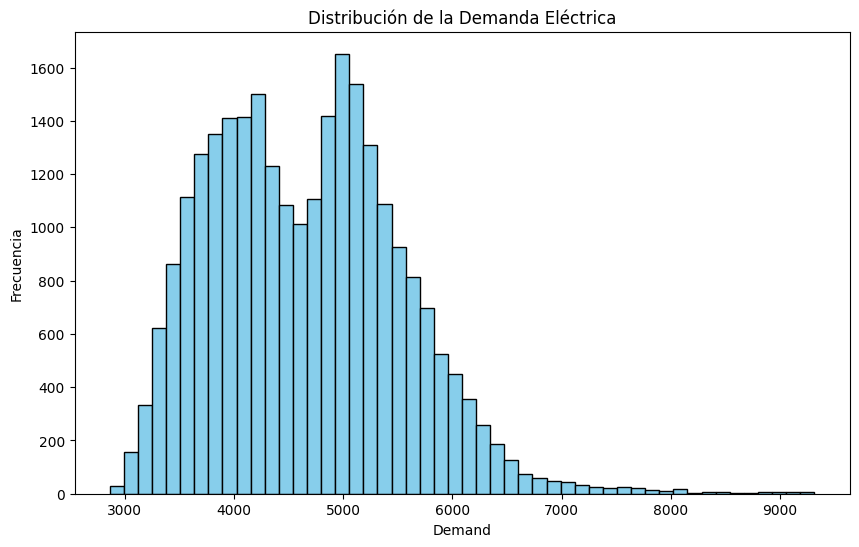

In [2]:

# Histograma de la demanda
plt.figure(figsize=(10, 6))
datos['Demand'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Demanda Eléctrica')
plt.xlabel('Demand')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()
    

### Distribución general de la demanda

El histograma de la demanda eléctrica muestra que la mayoría de los valores de demanda se agrupan entre 4000 y 5000 MWh, con algunos valores extremos que alcanzan hasta los 9000 MWh. Esto indica una distribución relativamente concentrada con algunos picos de demanda.

## Distribución de la demanda por hora del día

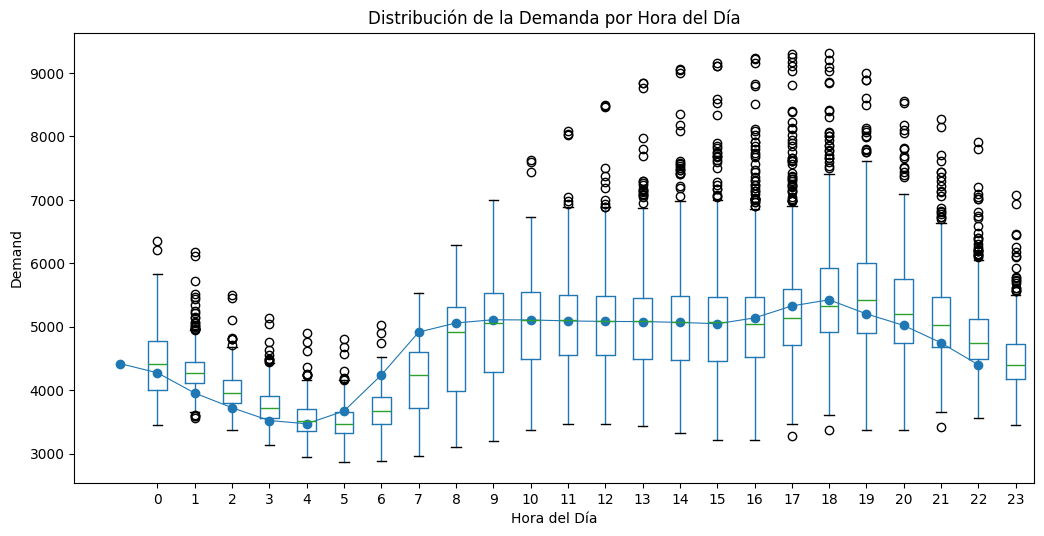

In [3]:

# Añadir una columna para la hora del día
datos['hora'] = datos.index.hour

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de caja por hora del día
datos.boxplot(column='Demand', by='hora', ax=ax)

# Superponer la mediana de la demanda por hora del día
datos.groupby('hora')['Demand'].median().plot(style='o-', linewidth=0.8, ax=ax)

# Configurar las etiquetas y el título
ax.set_ylabel('Demand')
ax.set_title('Distribución de la Demanda por Hora del Día')
fig.suptitle('')  # Eliminar el título automático generado por boxplot
ax.set_xlabel('Hora del Día')

# Mostrar el gráfico
plt.show()
    

### Distribución de la demanda por hora del día

El gráfico de caja por hora del día revela que:

- La demanda tiende a ser más baja durante las horas de la madrugada (0-6 am).
- La demanda aumenta gradualmente durante el día, alcanzando su punto máximo en las horas de la tarde y noche (5-10 pm).
- Hay una mayor variabilidad en la demanda durante las horas pico, lo que sugiere fluctuaciones más grandes en el consumo eléctrico en esos momentos.

## Distribución de la demanda por mes del año

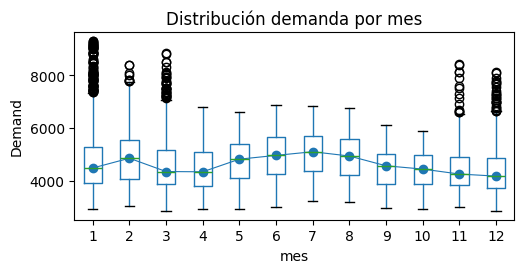

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado datos con una columna 'Demand' y un índice de tipo fecha

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5.5, 2.5))

# Añadir una columna para el mes
datos['mes'] = datos.index.month

# Crear el gráfico de caja por mes
datos.boxplot(column='Demand', by='mes', ax=ax)

# Superponer la mediana de la demanda por mes
datos.groupby('mes')['Demand'].median().plot(style='o-', linewidth=0.8, ax=ax)

# Configurar las etiquetas y el título
ax.set_ylabel('Demand')
ax.set_title('Distribución demanda por mes')
fig.suptitle('')  # Eliminar el título automático generado por boxplot

# Mostrar el gráfico
plt.show()


### Distribución de la demanda por mes del año

El gráfico de caja por mes del año muestra un patrón estacional claro:

- La demanda es más alta en los meses de invierno y verano (picos alrededor de enero y julio-agosto), lo cual puede estar relacionado con el uso de calefacción y aire acondicionado respectivamente.
- La variabilidad de la demanda es mayor en estos meses, indicando fluctuaciones más grandes en el consumo eléctrico durante las estaciones extremas.

## Relación entre temperatura y demanda eléctrica

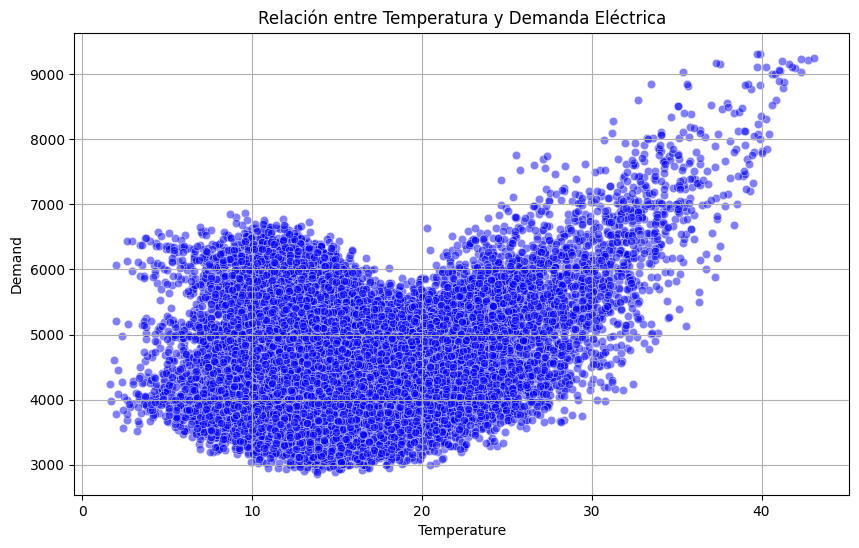

In [6]:

# Crear el diagrama de dispersión entre temperatura y demanda
plt.figure(figsize=(10, 6))
plt.scatter(datos['Temperature'], datos['Demand'], alpha=0.5, color='blue', edgecolors='w', linewidth=0.5)
plt.title('Relación entre Temperatura y Demanda Eléctrica')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.grid(True)
plt.show()
    


### Relación entre temperatura y demanda eléctrica

El diagrama de dispersión entre la temperatura y la demanda eléctrica indica:

- A temperaturas más bajas y más altas, la demanda tiende a ser mayor, lo que puede estar relacionado con el uso de calefacción y aire acondicionado.
- A temperaturas moderadas (alrededor de 15-20 °C), la demanda tiende a ser más baja, ya que se necesita menos energía para calentar o enfriar.

## Impacto de los días festivos en la demanda

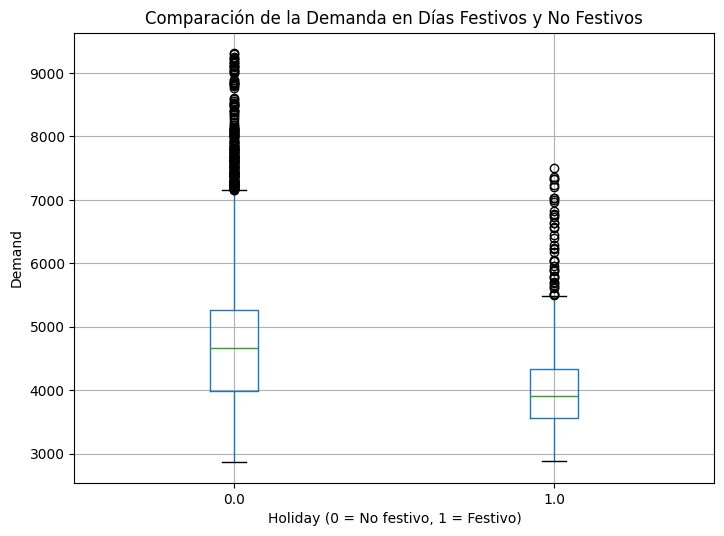

In [7]:

# Crear la figura y los ejes para comparar días festivos y no festivos
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de caja para la demanda en días festivos y no festivos
datos.boxplot(column='Demand', by='Holiday', ax=ax)

# Configurar las etiquetas y el título
ax.set_ylabel('Demand')
ax.set_title('Comparación de la Demanda en Días Festivos y No Festivos')
fig.suptitle('')  # Eliminar el título automático generado por boxplot
ax.set_xlabel('Holiday (0 = No festivo, 1 = Festivo)')

# Mostrar el gráfico
plt.show()
    

### Impacto de los días festivos en la demanda

El gráfico de caja comparando la demanda en días festivos y no festivos sugiere que:

- La demanda eléctrica tiende a ser ligeramente más baja en días festivos en comparación con los días no festivos. Esto podría deberse a la reducción de actividades comerciales y de oficina durante los días festivos.

## Matriz de correlación

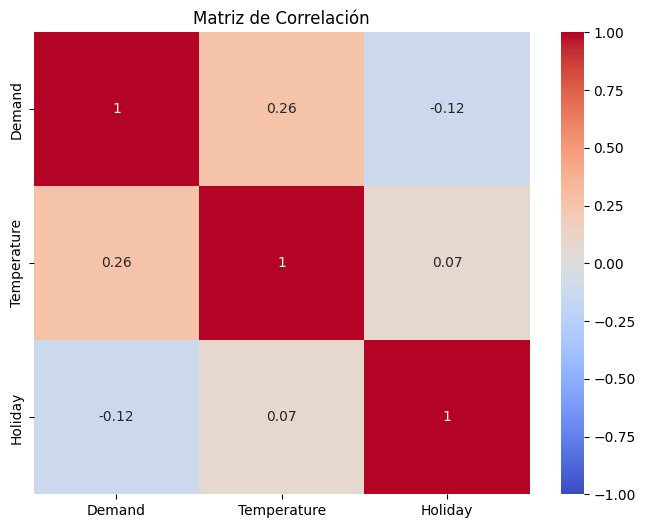

In [8]:

# Calcular la matriz de correlación
correlacion = datos[['Demand', 'Temperature', 'Holiday']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()
    

### Matriz de correlación

El mapa de calor de la matriz de correlación muestra:

- **Demand y Temperature**: Correlación positiva (a medida que aumenta la temperatura, también lo hace la demanda eléctrica, probablemente debido al uso de aire acondicionado).
- **Demand y Holiday**: Correlación negativa (la demanda tiende a ser más baja en los días festivos).

## Serie temporal de la demanda eléctrica

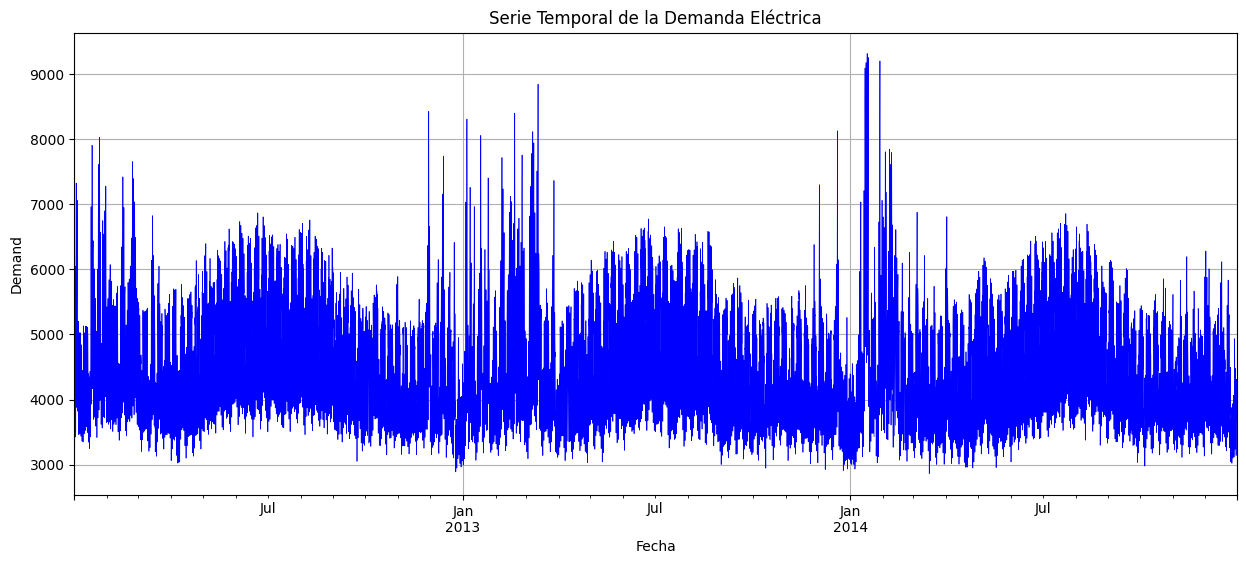

In [9]:

# Crear el gráfico de serie temporal
plt.figure(figsize=(15, 6))
datos['Demand'].plot(color='blue', linewidth=0.5)
plt.title('Serie Temporal de la Demanda Eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Demand')
plt.grid(True)
plt.show()
    



### Serie temporal de la demanda eléctrica

El gráfico de serie temporal muestra:

- Una tendencia general que varía con el tiempo, con fluctuaciones en diferentes periodos del año.
- Patrones estacionales evidentes, con picos recurrentes que podrían estar relacionados con los cambios estacionales en el clima y el comportamiento humano.